# ***Pattern Recognition Assignment 1***

---



### ***Ahmed Samy Ahmed - 4561***
### ***Omar Reda Abo El-yazed - 4767***
### ***Aboubakr Hussien - 4553***
### ***Ahmed Abdelhamed - 4566***


---



## **Imports & Drive Mount**

---



In [2]:
#===============#
#=== Imports ===#
#===============#
from google.colab import drive
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from numpy import linalg

Database = []                                                                   # Images Database

drive.mount('/content/drive', force_remount=True)

for character in range (1,41):                                                  # Persons
  for image in range (1,11):                                                    # 10 images per person
    Path = '/content/drive/My Drive/archive/s'+ str(character) +'/'             # Access each folder
    Img = mpimg.imread(Path + str(image) + '.pgm')                              # Access each image 
    Vector = np.array(Img).reshape(10304)                                       # Convert Every Image Into Vector of 10304 (92x112)
    Database.append(Vector)                                                     # Addd Vector To Database

print("Drive Mount ... Done")

Mounted at /content/drive
Drive Mount ... Done


## **Labels & Splitting**

---



In [3]:
Database = np.array(Database)

preYLabels=np.arange(1,41)                                                      #Matrix form 1 to 40 for each person
Y=np.repeat(preYLabels,10)                                                      #Repeat each element in array 
Y=np.reshape(Y,(400,1))

trainX=Database[::2]
testX=Database[1::2]
trainY=Y[::2,:]
testY=Y[1::2,:]


print("Labels & Splitting ... Done")

Labels & Splitting ... Done


## **PCA Calculation**

---



In [4]:
def EigenValuesAndVectors (trainX) :
  Mean = np.mean(trainX, axis=0)                                                # Calculate Mean
  Centered_Data = trainX - Mean                                                 # Calculate Centered Data
  Covariance = (np.transpose(Centered_Data).dot(Centered_Data))/len(trainX)     # Calculate Covariance
  EigenValues, EigenVectors = linalg.eigh(Covariance)                           # Calculate Eigenvalues and Eigenvectors

  # Prints For Check
  print("==============")
  print(Mean)
  print(Centered_Data)
  print(Covariance)
  print("==============")

  Temp = EigenValues.argsort()[::-1]                                            # Re-arrange Eigenvalues Indices Descendingly 
  EigenValues = EigenValues[Temp]                                               # Overwrite New Eigenvalues With The New Indices
  EigenVectors = EigenVectors[:,Temp]                                           # Overwrite Eigenvectors With The New Corresponding Eigenvalues

  # Prints For Check
  print("==============")
  print(Temp)
  print(EigenValues)
  print(EigenVectors)
  print("==============")

  return EigenValues,EigenVectors

EigenValues,EigenVectors = EigenValuesAndVectors(trainX)

print("Eigenvalues & Eigenvectors Calculations ... Done")


[86.115 86.265 86.685 ... 76.5   77.395 77.085]
[[-38.115 -37.265 -41.685 ... -29.5   -31.395 -31.085]
 [-47.115 -42.265 -33.685 ... -47.5   -51.395 -48.085]
 [-22.115 -10.265  -6.685 ... -41.5   -40.395 -38.085]
 ...
 [ 41.885  38.735  38.315 ...   8.5    12.605   6.915]
 [ 42.885  40.735  46.315 ...  16.5    15.605  15.915]
 [ 32.885  33.735  33.315 ...  12.5    16.605   7.915]]
[[1241.511775 1237.489525 1220.456225 ...  -69.8075    -99.755425
   -43.884775]
 [1237.489525 1250.244775 1227.058475 ...  -81.5325   -110.499675
   -55.222525]
 [1220.456225 1227.058475 1222.145775 ...  -79.0825   -114.060575
   -67.653225]
 ...
 [ -69.8075    -81.5325    -79.0825   ... 1894.       1865.0575
  1682.5425  ]
 [ -99.755425 -110.499675 -114.060575 ... 1865.0575   1970.238975
  1809.101425]
 [ -43.884775  -55.222525  -67.653225 ... 1682.5425   1809.101425
  1888.737775]]
[10303 10302 10301 ...     2     1     0]
[ 2.89336806e+06  2.01725036e+06  1.14824189e+06 ... -8.99621013e-10
 -1.46123935e-0

## **Eigenvalues Count & Projection Matrix**

---



In [5]:
# Count Needed Eigenvalues
def EigenValues_Counter(EigenValues,Alpha):  
  Sum_EigenValues = sum(EigenValues)                                            # Calculate Total Sum
  Initial_Sum = 0.0
  Number_Of_EigenValues = 0
  
  # Checking For Condition (Cummlative Sum Divided By Total Sum is Less Than Alpha Value)
  while Initial_Sum/Sum_EigenValues < Alpha:                                                           
    Initial_Sum = Initial_Sum + EigenValues[Number_Of_EigenValues]              # Calculate Cummlative Sum
    Number_Of_EigenValues = Number_Of_EigenValues + 1

  return Number_Of_EigenValues

print("Count Eigenvalues ... Done")

# Project Train Data & Test Data on Same Projection Matrix
def Projection(Projection_Matrix, Train_Data, Test_Data):
  Projected_Train = np.dot(Train_Data, Projection_Matrix.transpose())           # Project Train on Projection Matrix
  Projected_Test = np.dot(Test_Data, Projection_Matrix.transpose())             # Project Test on Projection Matrix
  return Projected_Train, Projected_Test

print("Projection Matrix ... Done")


Count Eigenvalues ... Done
Projection Matrix ... Done


## **Classifier Tuning**

---



In [7]:
Alpha = [0.8,0.85,0.9,0.95]                                                       # Alpha Values

def listingProjectedArrays(alpha,EigenValues,EigenVectors,trainX,testX) :
  Projected_Trains=[]
  Projected_Tests=[]

  for i in alpha :
    print(i)
    EigCounter = EigenValues_Counter(EigenValues, i)                            # Count Eigenvalues
    # Project Train & Test on Projection Matrix
    Projected_Train, Projected_Test = Projection(EigenVectors.transpose()[0:EigCounter], trainX, testX)
    Projected_Trains.append(Projected_Train)                                    # Add Projected Train To Train List
    Projected_Tests.append(Projected_Test)                                      # Add Projected Test To Train List

  return Projected_Trains, Projected_Tests 

# Call Listing Function
Projected_Trains,Projected_Tests = listingProjectedArrays(Alpha, EigenValues, EigenVectors, trainX, testX) 

print("Calculate Projection Matrix Per Each Alpha ... Done")  
print("Project Train & Test Lists on Projection Matrix Per Each Alpha ... Done")  


0.8
0.85
0.9
0.95
Calculate Projection Matrix Per Each Alpha ... Done
Project Train & Test Lists on Projection Matrix Per Each Alpha ... Done


# **KNN Classfication**

In [8]:
#===============#
#=== Imports ===#
#===============#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

K_Neighbours = [1,3,5,7]                                                        # Number of Neighbours

# K_Neighbours Function
def k_Neigh(K, Train, Test, TestLabel, Alpha, Train2):
   model = KNeighborsClassifier(n_neighbors= K)                                 # Create Classifer Model
   FitModel = model.fit(Train, Train2)                                          
   Predictions = model.predict(Test)                                                   
   Accuracy = accuracy_score(TestLabel, Predictions)                            # Calculate Accuracy
   print("For Alpha = ", Alpha,"\t With ", K, " Neighbours", "\t The Accuracy Will be = ", Accuracy)   
   return Accuracy

print("K-Neighbours Function ... Done")


K-Neighbours Function ... Done






## **Plotting & Results**

---



For Alpha =  0.8 	 With  1  Neighbours 	 The Accuracy Will be =  0.95
For Alpha =  0.85 	 With  1  Neighbours 	 The Accuracy Will be =  0.95
For Alpha =  0.9 	 With  1  Neighbours 	 The Accuracy Will be =  0.94
For Alpha =  0.95 	 With  1  Neighbours 	 The Accuracy Will be =  0.94
For Alpha =  0.8 	 With  3  Neighbours 	 The Accuracy Will be =  0.895
For Alpha =  0.85 	 With  3  Neighbours 	 The Accuracy Will be =  0.895
For Alpha =  0.9 	 With  3  Neighbours 	 The Accuracy Will be =  0.89
For Alpha =  0.95 	 With  3  Neighbours 	 The Accuracy Will be =  0.895
For Alpha =  0.8 	 With  5  Neighbours 	 The Accuracy Will be =  0.85
For Alpha =  0.85 	 With  5  Neighbours 	 The Accuracy Will be =  0.845
For Alpha =  0.9 	 With  5  Neighbours 	 The Accuracy Will be =  0.835
For Alpha =  0.95 	 With  5  Neighbours 	 The Accuracy Will be =  0.845
For Alpha =  0.8 	 With  7  Neighbours 	 The Accuracy Will be =  0.805
For Alpha =  0.85 	 With  7  Neighbours 	 The Accuracy Will be =  0.775
For A

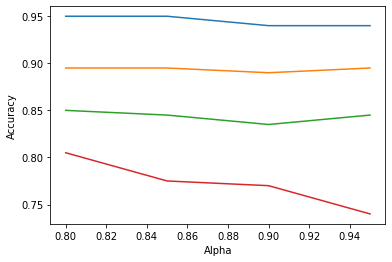

In [9]:
New_Train = trainY.flatten()                                                    # Change Labels Train List To 1D 
New_Test = testY.flatten()                                                      # Change Labels Test List To 1D   

def Results ():
  # Get Accuracy For Each Alpha per Each Neighbour 4 * 4 
  for i in range(4):
    Array = []                                                                  # Accuracy List                     
    Accuracy_Value = k_Neigh(K_Neighbours[i], Projected_Trains[0], Projected_Tests[0], New_Test, 0.8,New_Train)
    Array.append(Accuracy_Value)
    Accuracy_Value = k_Neigh(K_Neighbours[i], Projected_Trains[1], Projected_Tests[1], New_Test, 0.85,New_Train)
    Array.append(Accuracy_Value)
    Accuracy_Value = k_Neigh(K_Neighbours[i], Projected_Trains[2], Projected_Tests[2] , New_Test, 0.9,New_Train)
    Array.append(Accuracy_Value)
    Accuracy_Value = k_Neigh(K_Neighbours[i], Projected_Trains[3], Projected_Tests[3], New_Test, 0.95,New_Train)
    Array.append(Accuracy_Value)
    plt.plot([0.8,0.85,0.9,0.95],Array)                                         # Plot Alpha Values To Accuracy Values
  plt.xlabel("Alpha")
  plt.ylabel("Accuracy")
  plt.show()

Results()

# **Bonus** 

## **Spilt Data With Shuffling**

In [10]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(Database, Y, test_size=0.3)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape )

(280, 10304) (120, 10304)
(280, 1) (120, 1)


## **PCA**

In [11]:
EigenValues, EigenVectors = EigenValuesAndVectors(X_train)   

[87.275      87.10357143 87.56071429 ... 74.36071429 74.09285714
 75.12142857]
[[-63.275      -61.10357143 -65.56071429 ... 109.63928571 105.90714286
  102.87857143]
 [ 37.725       36.89642857  36.43928571 ... -38.36071429 -39.09285714
  -41.12142857]
 [-35.275      -40.10357143 -36.56071429 ... -44.36071429 -40.09285714
  -33.12142857]
 ...
 [-35.275      -45.10357143 -45.56071429 ... -37.36071429 -55.09285714
  -51.12142857]
 [ 20.725       24.89642857  22.43928571 ... -52.36071429 -44.09285714
  -55.12142857]
 [ 34.725       31.89642857  35.43928571 ...   5.63928571  11.90714286
    6.87857143]]
[[1261.76366071 1251.97508929 1247.78151786 ...  -93.19919643
   -69.74696429  -46.36910714]
 [1251.97508929 1259.5571301  1247.65264031 ...  -99.48735969
   -74.88818878  -52.01971939]
 [1247.78151786 1247.65264031 1251.38202806 ...  -89.58797194
   -63.43778061  -41.83594388]
 ...
 [ -93.19919643  -99.48735969  -89.58797194 ... 1954.8948852
  1777.19864796 1723.10262755]
 [ -69.74696429  

## **Projection**

In [12]:
Projected_Trains, Projected_Tests = listingProjectedArrays(Alpha, EigenValues, EigenVectors, X_train, X_test)

0.8
0.85
0.9
0.95


## **KNN & Alpha values**

In [13]:
Alpha = [0.8,0.85,0.9,0.95]
K_Neighbours = [1,3,5,7]  # Number of Neighbours


## **KNN Classfication & Results**

For Alpha =  0.8 	 With  1  Neighbours 	 The Accuracy Will be =  0.9583333333333334
For Alpha =  0.85 	 With  1  Neighbours 	 The Accuracy Will be =  0.975
For Alpha =  0.9 	 With  1  Neighbours 	 The Accuracy Will be =  0.975
For Alpha =  0.95 	 With  1  Neighbours 	 The Accuracy Will be =  0.9666666666666667
For Alpha =  0.8 	 With  3  Neighbours 	 The Accuracy Will be =  0.8583333333333333
For Alpha =  0.85 	 With  3  Neighbours 	 The Accuracy Will be =  0.875
For Alpha =  0.9 	 With  3  Neighbours 	 The Accuracy Will be =  0.8666666666666667
For Alpha =  0.95 	 With  3  Neighbours 	 The Accuracy Will be =  0.875
For Alpha =  0.8 	 With  5  Neighbours 	 The Accuracy Will be =  0.8083333333333333
For Alpha =  0.85 	 With  5  Neighbours 	 The Accuracy Will be =  0.8
For Alpha =  0.9 	 With  5  Neighbours 	 The Accuracy Will be =  0.8083333333333333
For Alpha =  0.95 	 With  5  Neighbours 	 The Accuracy Will be =  0.8
For Alpha =  0.8 	 With  7  Neighbours 	 The Accuracy Will be =  0.7

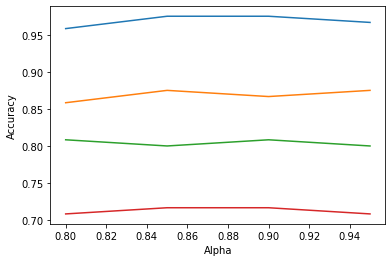

In [14]:
New_Train = y_train.flatten()                                                    # Change Labels Train List To 1D 
New_Test = y_test.flatten()                                                      # Change Labels Test List To 1D   
                                                 
def Results ():
  # Get Accuracy For Each Alpha per Each Neighbour 4 * 4 
  for i in range(4):
    Array = []         # Accuracy List
    Accuracy_Value = k_Neigh(K_Neighbours[i], Projected_Trains[0], Projected_Tests[0], New_Test, 0.8, New_Train)
    Array.append(Accuracy_Value)
    Accuracy_Value = k_Neigh(K_Neighbours[i], Projected_Trains[1], Projected_Tests[1], New_Test, 0.85, New_Train)
    Array.append(Accuracy_Value)
    Accuracy_Value = k_Neigh(K_Neighbours[i], Projected_Trains[2], Projected_Tests[2], New_Test, 0.9, New_Train)
    Array.append(Accuracy_Value)
    Accuracy_Value = k_Neigh(K_Neighbours[i], Projected_Trains[3], Projected_Tests[3], New_Test, 0.95, New_Train)
    Array.append(Accuracy_Value)
    plt.plot([0.8,0.85,0.9,0.95],Array)                                         # Plot Alpha Values To Accuracy Values
    
  plt.xlabel("Alpha")
  plt.ylabel("Accuracy")
  plt.show()

Results()